In [6]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [29]:
data_path = 'output/biomarkers_stats.csv'
data = pd.read_csv(data_path)

In [ ]:
print(data)

In [31]:
label_path = 'data/Umass_data/y_train.npy'
labels = np.load(label_path)
labels = pd.Series(labels)

In [26]:
print(labels)

0       5
1       5
2       5
3       5
4       5
       ..
1402    5
1403    5
1404    0
1405    5
1406    5
Length: 1407, dtype: int32


In [ ]:
# data['labels'] = labels

/var/folders/9z/c8zgd2f972g89cddtqnkhbqh0000gn/T/ipykernel_67213/3699363273.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, order=np.sort(np.unique(labels)), palette='hls', stat='percent')


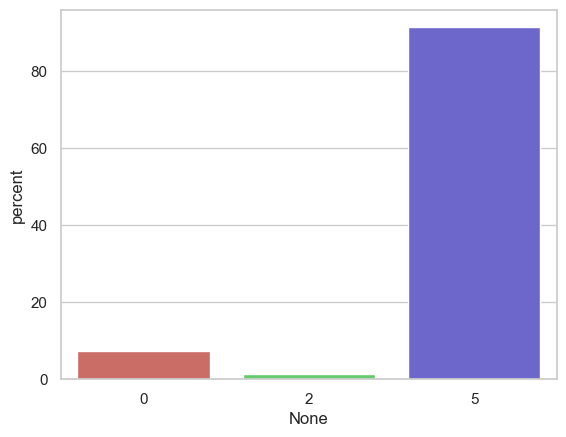

In [28]:
sns.countplot(x=labels, order=np.sort(np.unique(labels)), palette='hls', stat='percent')
plt.show()

In [56]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=5)
rfe = rfe.fit(data, labels.values.ravel())
print(rfe.support_)
print(rfe.ranking_)


/Users/cdllyyy/opt/anaconda3/envs/PPG/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/cdllyyy/opt/anaconda3/envs/PPG/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

[False False False  True False False  True False False  True False False
  True False False False False False  True False False False False False
 False False False False]
[24  8  5  1  2  4  1 19 15  1  6 12  1  7  9  3 13 18  1 16 20 11 17 23
 22 10 21 14]


/Users/cdllyyy/opt/anaconda3/envs/PPG/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/cdllyyy/opt/anaconda3/envs/PPG/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

In [60]:
columns_selected = data.columns[rfe.support_]
print(columns_selected)

Index(['Tpi_std', 'Tpi_iqr', 'Tpi_mad', 'Tpp_std', 'Tpp_mad'], dtype='object')


In [69]:
print(labels.unique())  # Should show: [0, 2, 5]


[5 0 2]


In [71]:
import statsmodels.api as sm
os_data = data[columns_selected]
y = labels.astype('category')
print(y.cat.categories)
y_encoded = y.cat.codes
X = sm.add_constant(os_data)

Index([0, 2, 5], dtype='int32')


In [72]:
import statsmodels.api as sm
logit_model=sm.MNLogit(y_encoded,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.167124
         Iterations 10
                        Results: MNLogit
Model:              MNLogit          Method:           MLE       
Dependent Variable: y                Pseudo R-squared: 0.502     
Date:               2025-05-01 01:11 AIC:              494.2878  
No. Observations:   1407             BIC:              557.2783  
Df Model:           10               Log-Likelihood:   -235.14   
Df Residuals:       1395             LL-Null:          -471.82   
Converged:          1.0000           LLR p-value:      2.1677e-95
No. Iterations:     10.0000          Scale:            1.0000    
-----------------------------------------------------------------
  y = 0      Coef.   Std.Err.     t     P>|t|    [0.025    0.975]
-----------------------------------------------------------------
  const     -3.1184    0.6078  -5.1307  0.0000   -4.3097  -1.9272
Tpi_std     11.5731   12.0402   0.9612  0.3365  -12.0253  35.171